# **Neural network regression with tensorflow**

In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf

2024-07-09 20:07:30.387508: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 20:07:30.394509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 20:07:30.403659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 20:07:30.403672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 20:07:30.409951: I tensorflow/core/platform/cpu_feature_gua

In [3]:
print(tf.__version__)

2.16.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

## **Generating datasets**

In [5]:
# Create features
X = np.arange(start = -7, stop = 15, step = 3, dtype = 'float32')

In [6]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

In [7]:
# Create labels
y = np.arange(start = 3, stop = 25, step = 3, dtype = 'float32')

In [8]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)

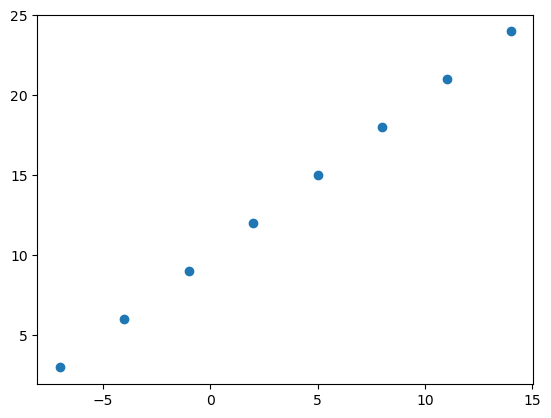

In [9]:
plt.scatter(X, y)
plt.show()

In [10]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
X = tf.constant(X)

2024-07-09 20:07:32.383882: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 20:07:32.407125: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 20:07:32.407164: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 20:07:32.408511: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 20:07:32.408539: I external/local_xla/xla/stream_executor

In [12]:
y = tf.constant(y)

## **Creating a model**

In [13]:
tf.random.set_seed(42)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [16]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 12.1929 - mae: 12.1929
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0604 - mae: 12.0604
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.9279 - mae: 11.9279
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.7954 - mae: 11.7954
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.6629 - mae: 11.6629


I0000 00:00:1720548453.078374   21283 service.cc:145] XLA service 0x7ff92c004a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720548453.078415   21283 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-09 20:07:33.085872: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-09 20:07:33.107009: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720548453.203281   21283 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [17]:
y_pred = model.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [18]:
y_pred

array([[9.373706]], dtype=float32)

## **Improving the model**

#### **Inrease number of epochs**

In [19]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [20]:
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [21]:
model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 18.1066 - mae: 18.1066
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.8254 - mae: 17.8254
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.5441 - mae: 17.5441
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.2629 - mae: 17.2629
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.9816 - mae: 16.9816
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 16.7004 - mae: 16.7004
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.4191 - mae: 16.4191
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.1379 - mae: 16.1379
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.8566 - mae: 15.8566
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.5754 - mae: 15.5754
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.2941 - mae: 15.2941
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.0129 - mae: 15.0129
Epoch 13/100
1/1 ━━━━━━━

In [22]:
y_pred2 = model2.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [23]:
y_pred2

array([[29.367283]], dtype=float32)

#### **Add extra hidden layer**

In [24]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [25]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [26]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 13.6696 - mae: 13.6696
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.1927 - mae: 13.1927
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.7318 - mae: 12.7318
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.2698 - mae: 12.2698
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8041 - mae: 11.8041
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.3264 - mae: 11.3264
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.8369 - mae: 10.8369
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3281 - mae: 10.3281
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7980 - mae: 9.7980
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2346 - mae: 9.2346
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.6376 - mae: 8.6376
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.0017 - mae: 8.0017
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [27]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [28]:
y_pred3

array([[31.093699]], dtype=float32)

#### **Some more changes**

1. Decreasing numbers of neurons in the first hidden layer

In [29]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [30]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [31]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 13.0414 - mae: 13.0414
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.5033 - mae: 12.5033
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.9614 - mae: 11.9614
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4129 - mae: 11.4129
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.8548 - mae: 10.8548
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.2845 - mae: 10.2845
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6988 - mae: 9.6988
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.0948 - mae: 9.0948
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.4695 - mae: 8.4695
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.8195 - mae: 7.8195
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2494 - mae: 7.2494
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2289 - mae: 7.2289
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [32]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [33]:
y_pred3

array([[30.325798]], dtype=float32)

2. Change optimizer function to Adam with default arguments

In [34]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [35]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

In [36]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 12.1338 - mae: 12.1338
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.0680 - mae: 12.0680
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.0022 - mae: 12.0022
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9362 - mae: 11.9362
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8702 - mae: 11.8702
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8041 - mae: 11.8041
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.7380 - mae: 11.7380
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.6717 - mae: 11.6717
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.6053 - mae: 11.6053
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.5389 - mae: 11.5389
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4723 - mae: 11.4723
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.4056 - mae: 11.4056
Epoch 13/100
1/1 ━━━━━━━

In [37]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [38]:
y_pred

array([[9.373706]], dtype=float32)

3. Set learning rate to 0.01 for Adam optimizer

In [39]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [40]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [41]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 13.9552 - mae: 13.9552
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.2938 - mae: 13.2938
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6389 - mae: 12.6389
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.9900 - mae: 11.9900
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.3451 - mae: 11.3451
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.7014 - mae: 10.7014
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.0548 - mae: 10.0548
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.4020 - mae: 9.4020
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7400 - mae: 8.7400
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0659 - mae: 8.0659
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.3772 - mae: 7.3772
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7446 - mae: 6.7446
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [42]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [43]:
y_pred3

array([[26.428444]], dtype=float32)

## **Evaluating a model**

In [44]:
X2 = tf.range(-100, 100, 4)

In [45]:
X2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [46]:
y2 = X2 + 10

In [47]:
y2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

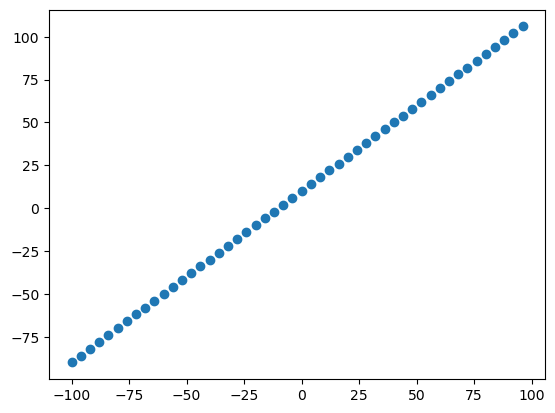

In [48]:
plt.scatter(X2, y2)
plt.show()

In [49]:
X2_train = X2[:40]

In [50]:
y2_train = y2[:40]

In [51]:
X2_test = X2[40:]

In [52]:
y2_test = y2[40:]

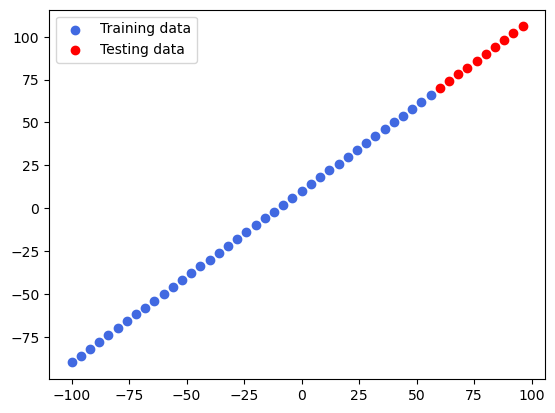

In [53]:
plt.scatter(X2_train, y2_train, c = 'royalblue', label = 'Training data')
plt.scatter(X2_test, y2_test, c = 'red', label = 'Testing data')
plt.legend()
plt.show()

In [54]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

/home/oggy/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [57]:
model4.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 79.8171 - mae: 79.8171 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.7248 - mae: 44.7248 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.9600 - mae: 12.9600 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3453 - mae: 8.3453 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0499 - mae: 9.0499 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0424 - mae: 8.0424 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7444 - mae: 9.7444 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0245 - mae: 8.0245 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7328 - mae: 9.7328 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0067 - mae: 8.0067 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7212 - mae: 9.7212 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9888 - mae: 7.9888 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [60]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
y2_pred = model4.predict(tf.expand_dims(X2_test, axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [59]:
y2_test, y2_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[57.212948],
        [60.934727],
        [64.65651 ],
        [68.37829 ],
        [72.10007 ],
        [75.821846],
        [79.54363 ],
        [83.26541 ],
        [86.98719 ],
        [90.70897 ]], dtype=float32))